<a href="https://colab.research.google.com/github/javed163/Deep-Learning/blob/main/Batch_Norm_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/3.concertriccir2.csv")

In [45]:
data.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure the file path is correct
file_path = "/content/drive/MyDrive/Datasets/3.concertriccir2.csv"
# Add error handling for file reading
try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Proceed with renaming columns only if data is loaded successfully
if data is not None:
    data.rename(columns={'7.003345706103683010e-01': 'X1', '-2.470675778972781789e-01': 'X2', '0.000000000000000000e+00': 'Y'}, inplace=True)
    data.head()
else:
    print("Data loading failed. Cannot proceed with renaming columns.")

File loaded successfully!


In [47]:
data.head()

,X1,X2,Y
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


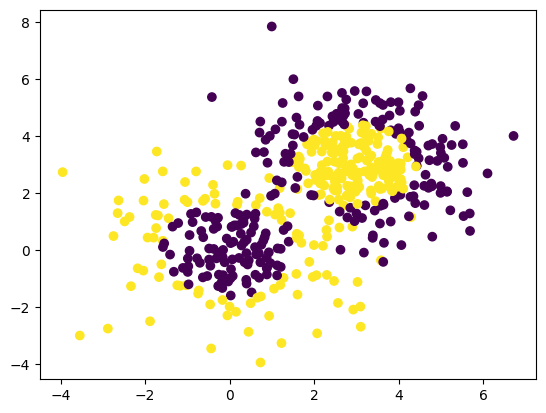

In [48]:
plt.scatter(data['X1'],data['X2'], c = data['Y'])

In [49]:
x = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [50]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [51]:
# without batch normalization
model = Sequential()
model.add(Dense(2, activation = 'relu',  input_dim = 2))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [53]:
history11 = model.fit(x,y, epochs = 50, validation_split = 0.2)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5098 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.7297
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5857 - loss: 0.6722 - val_accuracy: 0.5300 - val_loss: 0.7294
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5141 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.7263
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5629 - loss: 0.6863 - val_accuracy: 0.5100 - val_loss: 0.7252
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5490 - loss: 0.6825 - val_accuracy: 0.5100 - val_loss: 0.7235
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5090 - loss: 0.6868 - val_accuracy: 0.5400 - val_loss: 0.7240
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5197 - loss: 0.6853 - val_accuracy: 0.5300 - val_loss: 0.7229
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5354 - loss: 0.6885 - val_accuracy: 0.5200 - val_loss

In [54]:
model1 = Sequential()
model1.add(Dense(3, activation = 'relu',  input_dim = 2))
model1.add(BatchNormalization())
model1.add(Dense(2, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation = 'sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [55]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
history2 = model.fit(x,y, epochs = 50, validation_split = 0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6496 - loss: 0.6645 - val_accuracy: 0.6200 - val_loss: 0.7030
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6730 - val_accuracy: 0.6200 - val_loss: 0.7031
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6343 - loss: 0.6733 - val_accuracy: 0.6200 - val_loss: 0.7025
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6281 - loss: 0.6721 - val_accuracy: 0.6200 - val_loss: 0.7019
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6768 - loss: 0.6599 - val_accuracy: 0.6200 - val_loss: 0.7028
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6456 - loss: 0.6679 - val_accuracy: 0.6200 - val_loss: 0.7017
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6219 - loss: 0.6725 - val_accuracy: 0.6200 - val_loss: 0.7007
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6458 - loss: 0.6707 - val_accuracy: 0.6200 - val_loss:

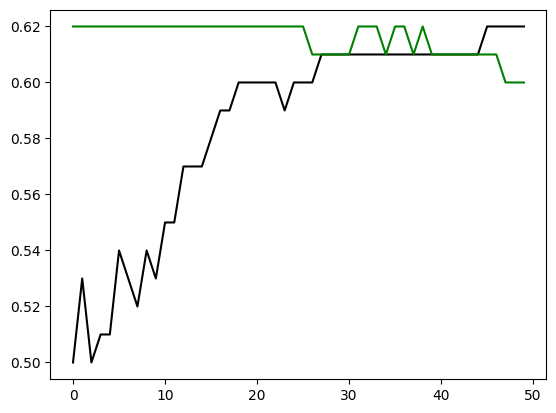

In [58]:
plt.plot(history11.history['val_accuracy'], color = 'black')
plt.plot(history2.history['val_accuracy'], color = 'green')